<a href="https://colab.research.google.com/github/MrLuksR/CFE-P2-R1/blob/master/Regresi%C3%B3n_lineal_simple_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Listar Datos:

In [3]:
import pandas as pd
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Relaciones de forma graficada:

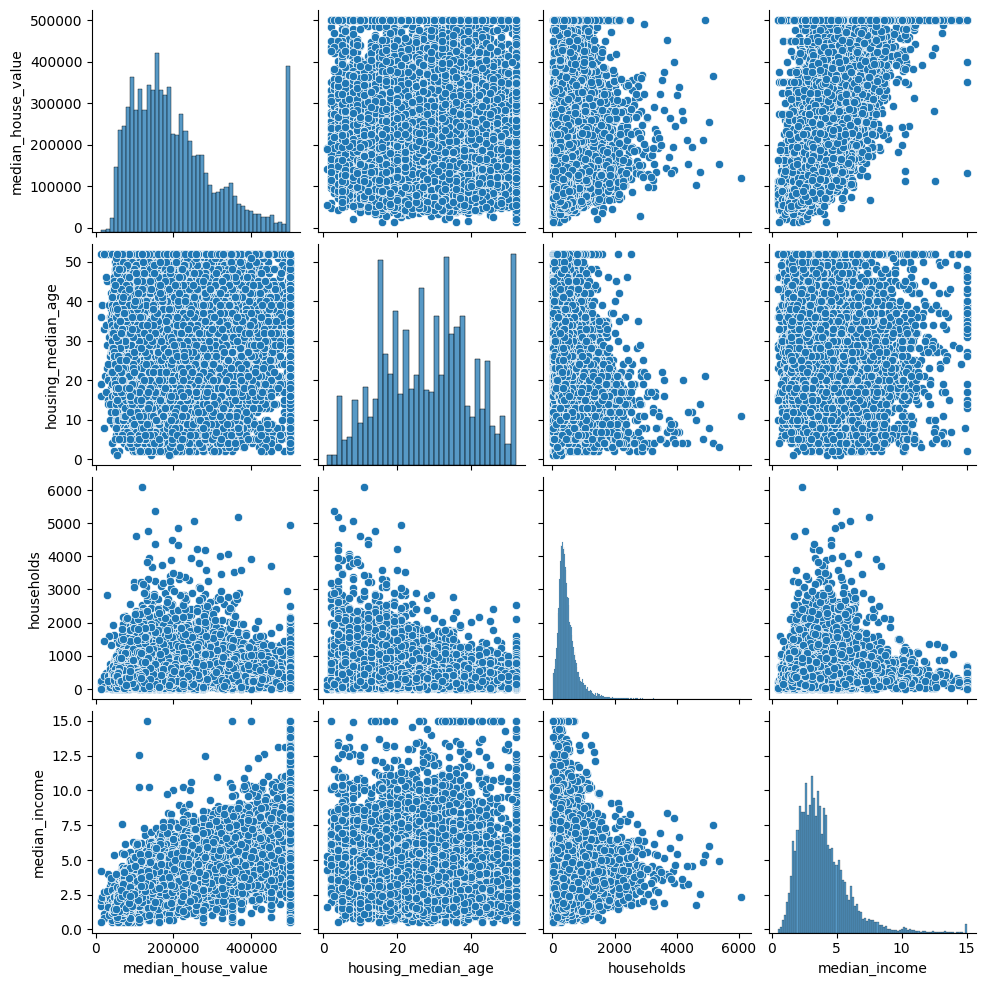

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['median_house_value', 'housing_median_age', 'households', 'median_income']
sns.pairplot(df[cols])
plt.show()

Mapa de calor:

<Axes: >

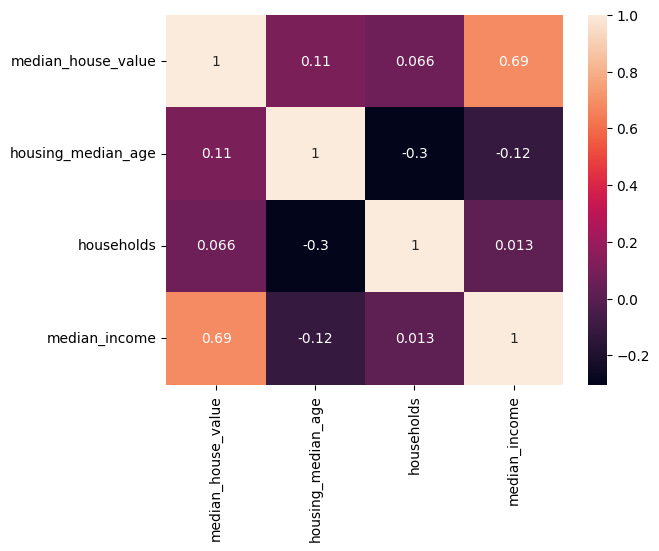

In [7]:
sns.heatmap(df[cols].corr(), annot=True)

Creación y ajuste de un modelo de Regresión Lineal con Scikit-learn

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Separamos las variables dependientes e independientes
X = df['median_income'].values.reshape(-1,1)
Y = df['median_house_value'].values.reshape(-1,1)


# Estandarizamos los valores
ss_x = StandardScaler()
ss_y = StandardScaler()

X_ss = ss_x.fit_transform(X)
Y_ss = ss_y.fit_transform(Y)

# Creamos y entrenamos el modelo
lr = LinearRegression()
lr.fit(X_ss, Y_ss)

LinearRegression()

In [28]:
import numpy as np

# Ingresamos una entrada de ejemplo y la estandarizamos
num_ingr = input("Ingreso medio anual en USD en una manzana: ")

num_ingr_std = ss_x.transform([[num_ingr]])

result_std = lr.predict(num_ingr_std)
result = ss_y.inverse_transform(result_std)

# Predecimos el resultado y lo des-estandarizamos
print("Predicion en miles de dolares: ", "US$", round(result[0][0], 2))

Ingreso medio anual en USD en una manzana: 8.4
Predicion en miles de dolares:  US$ 396153.91
